<H1>Coursera IBM Applied Datascience Capstone</H1>

<H2>1. Introduction</H2>

I'm going to examine the differences in venue location between two vastly different cities. I'll compare Los Angeles, California and Burlington, Vermont. 

Burlington is the largest city in Chittenden County Vermont with a population of just over 42,000. Burlington houses the larges airport in Vermont and was the Nation's first city to fully convert to renewable energy.  The major industries in Burlington center around the University of Vermont, a private college, and its associated medical center. Additionaly, a few larger companies have software divisions located within Burlington.

Los Angeles, California has a population of 13.1 million people. Second only to New York as the most populous cities in the United States. In fact, Los Angeles county is the most populous county in the US. Los Angeles covers more than 460 square miles. With a gross metropolitan product of over 1 trillion dollars, LA is the third largest metopolitan economy in the world, larger than many countries. The economy of Los Angeles is driven largely by international trade with two of the largest ports in the world and by the entertainment industry. LA is also a major manufacturing center for the United States.

There are a lot of differences between these two cites. However, both cities have a significant eco-friendly emphasis, though not for the same things. Many such initiatives become trending in Los Angeles as people try to mimic the celebrities located there. Such efforts in Burlington draw decidely less attention, but seem to be more ingrained within the fabric of daily life.

Does the size of these cities and the differences in mindset impact the proximity of various venues to the center of these cities? Does a particular category of venue seem to predominate within each city?

<H2>2. Data</H2>

Exploratory venue data will be obtained for both cities from Foursquare. I'll use various Python libraries to look at the locations of these venues in relationship to the center of each city. I'll also compare the diversity of venues between the two cities.

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas import json_normalize
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

!pip install folium
import folium

     |████████████████████████████████| 94 kB 5.5 MB/s  eta 0:00:01


In [2]:
# @hidden_cell

CLIENT_ID='ROOX3NJ34KEQE4EQLBAY1OXYIIXNHIYYJU1JCVGVPAW0PSVJ'
CLIENT_SECRET='CILQHFLRWG23B5JULVVYOIB13NWS3PDULBHJDE5OCPSO0VWF'
VERSION = '20210101'
LIMIT = 100

In [3]:
#Get locations for the two cities
ca_address="Los Angeles, California"
vt_address="Burlington, Vermont"

geolocator = Nominatim(user_agent="cn_explorer")

ca_location = geolocator.geocode(ca_address)
ca_latitude = ca_location.latitude
ca_longitude = ca_location.longitude

vt_location = geolocator.geocode(vt_address)
vt_latitude = vt_location.latitude
vt_longitude = vt_location.longitude

In [4]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#function to get nearby venues for the two cities
def getNearbyVenues(name, latitude, longitude, radius=1000):
    
    venues_list = []
    print(name)
    
    searchType = 'explore'
    #create the API request
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&ll={}, {}&v={}&radius={}&limit={}&intent=browse'.format(
        searchType,
        CLIENT_ID,
        CLIENT_SECRET,
        latitude,
        longitude,
        VERSION,
        radius,
        LIMIT)

    #create the GET request
    result = requests.get(url).json()
    
    if searchType == 'explore':
        venues = result['response']['groups'][0]['items']
    else:
        if len(result['response']['venues'])==0:
            return('No tredning venues at this time')
        else:
            venues = result['response']['venues']
    
    nearby_venues = json_normalize(venues)
    
    #remove unwanted columns
    filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng', 'venue.categories']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    #get category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    
    #fix headers
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    return(nearby_venues)

In [5]:
#Get the nearby venues for the LA
LA_venues = getNearbyVenues(name="LA",
                                  latitude=ca_latitude,
                                  longitude=ca_longitude)

#Get the nearby venues for Burlington
burlington_venues = getNearbyVenues(name="Burlington",
                                  latitude=vt_latitude,
                                  longitude=vt_longitude)

LA
Burlington


In [13]:
LA_venues

,name,lat,lng,categories,center_dist
0,Grand Park,34.055034,-118.245179,Park,0.268012
1,Badmaash,34.051342,-118.244571,Indian Restaurant,0.309260
2,Redbird,34.050666,-118.244068,American Restaurant,0.356410
3,Kinokuniya Bookstore,34.050145,-118.242246,Bookstore,0.396289
4,Birds & Bees,34.052090,-118.247376,Speakeasy,0.461168
...,...,...,...,...,...
95,Mendocino Farms,34.052485,-118.251422,Sandwich Place,0.810283
96,Japanese American Cultural & Community Center ...,34.047810,-118.241628,Concert Hall,0.660793
97,Olio Wood Fire Pizzeria,34.050746,-118.248953,Pizza Place,0.658028
98,Sanrio,34.049034,-118.239956,Gift Shop,0.578018


In [6]:
burlington_venues

,name,lat,lng,categories
0,American Flatbread,44.476618,-73.214058,Pizza Place
1,Onyx Tonics,44.477074,-73.214772,Coffee Shop
2,Burlington Farmers' Market,44.476528,-73.213548,Farmers Market
3,Mad River Distillers Burlington,44.476062,-73.214180,Distillery
4,The Farmhouse Tap & Grill,44.478278,-73.213233,Gastropub
5,Church Street Marketplace,44.478649,-73.212708,Shopping Mall
6,A Single Pebble,44.478005,-73.214480,Chinese Restaurant
7,Dobra Tea,44.478213,-73.212494,Tea Room
8,Friendly Toast,44.477422,-73.214131,Breakfast Spot
9,Leunig's Bistro,44.477178,-73.212605,Bistro


<H2>3. Methods</H2>

Initial analysis of the data will begin by looking at the geographic distribution of the venues using geopy. I'll calculate a distance from city center for each venue and then summarize those by venue category and overall average distance. These distances will be compared between cities.

A comparison of categories will also be performed. Given the large difference in population between the two cities, this will be done via percentage. For example, what percentage of the venues are for coffee shops between the two cities and so forth.

Lastly, I'll look at the mix of trending venues between the two cities. This will be a more subjective measure in an attempt to see if the general type of trending venue differs between cities.

<H2>4. Results</H2>

In [14]:
from geopy import distance
#start by looking at distance from city center for each venue
#LA First
la_center = (ca_latitude, ca_longitude)
LA_venues['center_dist'] = [distance.distance((a, b), la_center).km for a, b in LA_venues[['lat', 'lng']].values]
LA_venues

,name,lat,lng,categories,center_dist
0,Grand Park,34.055034,-118.245179,Park,0.268012
1,Badmaash,34.051342,-118.244571,Indian Restaurant,0.309260
2,Redbird,34.050666,-118.244068,American Restaurant,0.356410
3,Kinokuniya Bookstore,34.050145,-118.242246,Bookstore,0.396289
4,Birds & Bees,34.052090,-118.247376,Speakeasy,0.461168
...,...,...,...,...,...
95,Mendocino Farms,34.052485,-118.251422,Sandwich Place,0.810283
96,Japanese American Cultural & Community Center ...,34.047810,-118.241628,Concert Hall,0.660793
97,Olio Wood Fire Pizzeria,34.050746,-118.248953,Pizza Place,0.658028
98,Sanrio,34.049034,-118.239956,Gift Shop,0.578018


In [6]:
#Burlington
burl_center = (vt_latitude, vt_longitude)
burlington_venues['center_dist'] = [distance.distance((a, b), burl_center).km for a, b in burlington_venues[['lat', 'lng']].values]
burlington_venues.head()

,name,lat,lng,categories,center_dist
0,American Flatbread,44.476618,-73.214058,Pizza Place,0.104825
1,Onyx Tonics,44.477074,-73.214772,Coffee Shop,0.179838
2,Burlington Farmers' Market,44.476528,-73.213548,Farmers Market,0.065400
3,Mad River Distillers Burlington,44.476062,-73.214180,Distillery,0.101947
4,The Farmhouse Tap & Grill,44.478278,-73.213233,Gastropub,0.236785


In [16]:
#average of all venues from city center
print("LA Average distance from city center:", LA_venues['center_dist'].mean())
print("Burlington distance from city center:", burlington_venues['center_dist'].mean())

LA Average distance from city center: 0.6098027630776499
Burlington distance from city center: 0.36849075264723063


In [8]:
#Now average by venue category for the two cities
la_grouped_avg = LA_venues.groupby('categories')['center_dist'].mean().to_frame()
burl_grouped_avg = burlington_venues.groupby('categories')['center_dist'].mean().to_frame()

In [17]:
combined_venue_avg = la_grouped_avg.merge(burl_grouped_avg, left_on='categories', right_on='categories', how='outer', sort='categories')
combined_venue_avg.columns = ['LA_dist','Burl_dist']
print("Here are the average distances for each venue category for both cities:")
combined_venue_avg

Here are the average distances for each venue category for both cities:


,LA_dist,Burl_dist
categories,,
Accessories Store,NaN,0.363700
American Restaurant,0.356410,0.203655
Aquarium,NaN,0.663499
Art Gallery,0.511891,NaN
Art Museum,0.708762,0.984886
...,...,...
Udon Restaurant,0.491567,NaN
Vegetarian / Vegan Restaurant,NaN,0.194302
Wine Shop,NaN,0.845053


In [10]:
#create dataframe for the categories the exist in both cities
combined_venue_avg_inner = la_grouped_avg.merge(burl_grouped_avg, left_on='categories', right_on='categories', how='inner', sort='categories')
combined_venue_avg_inner.columns = ['LA_dist','Burl_dist']
combined_venue_avg_inner

#perform t test on the average distances for the two cities
from scipy import stats
stats.ttest_ind(combined_venue_avg_inner['LA_dist'], combined_venue_avg_inner['Burl_dist'])


Ttest_indResult(statistic=3.3934381358190735, pvalue=0.0014290500500426819)

In [18]:
#Now get a count of each venue category for the two cities
la_grouped_count = LA_venues[['name', 'categories']].groupby('categories').count()
burl_grouped_count = burlington_venues[['name', 'categories']].groupby('categories').count()
la_total = len(la_grouped_count.index)
burl_total = len(burl_grouped_count.index)
combined_venue_count = la_grouped_count.merge(burl_grouped_count, left_on='categories', right_on='categories', how='outer', sort='categories')
combined_venue_count.columns = ['LA_count','Burl_count']
combined_venue_count.fillna(0, inplace=True)
combined_venue_count['LA_pct'] = combined_venue_count['LA_count']/la_total
combined_venue_count['Burl_pct'] = combined_venue_count['Burl_count']/burl_total
print("The percentages of each venue category between the two cities are:")
combined_venue_count

The percentages of each venue category between the two cities are:


,LA_count,Burl_count,LA_pct,Burl_pct
categories,,,,
Accessories Store,0.0,1.0,0.000000,0.014925
American Restaurant,1.0,2.0,0.017241,0.029851
Aquarium,0.0,1.0,0.000000,0.014925
Art Gallery,1.0,0.0,0.017241,0.000000
Art Museum,2.0,1.0,0.034483,0.014925
...,...,...,...,...
Udon Restaurant,1.0,0.0,0.017241,0.000000
Vegetarian / Vegan Restaurant,0.0,2.0,0.000000,0.029851
Wine Shop,0.0,1.0,0.000000,0.014925


In [29]:
#Sort this dataframe for top 10 in LA
df_LA = combined_venue_count.sort_values(by=['LA_pct','categories'], ascending=False)
df_LA.head(10)

,LA_count,Burl_count,LA_pct,Burl_pct
categories,,,,
Sushi Restaurant,8.0,0.0,0.137931,0.000000
Coffee Shop,6.0,3.0,0.103448,0.044776
Japanese Restaurant,5.0,0.0,0.086207,0.000000
Mexican Restaurant,4.0,2.0,0.068966,0.029851
Theater,3.0,0.0,0.051724,0.000000
Ramen Restaurant,3.0,0.0,0.051724,0.000000
Plaza,3.0,0.0,0.051724,0.000000
Music Venue,3.0,1.0,0.051724,0.014925
Ice Cream Shop,3.0,2.0,0.051724,0.029851


In [28]:
#Sort this dataframe for top 10 in each city
df_Burl = combined_venue_count.sort_values(by=['Burl_pct','categories'], ascending=False)
df_Burl.head(10)

,LA_count,Burl_count,LA_pct,Burl_pct
categories,,,,
Pizza Place,2.0,5.0,0.034483,0.074627
Breakfast Spot,2.0,5.0,0.034483,0.074627
Coffee Shop,6.0,3.0,0.103448,0.044776
Brewery,1.0,3.0,0.017241,0.044776
Bed & Breakfast,0.0,3.0,0.000000,0.044776
Bar,3.0,3.0,0.051724,0.044776
Bakery,1.0,3.0,0.017241,0.044776
Yoga Studio,0.0,2.0,0.000000,0.029851
Vegetarian / Vegan Restaurant,0.0,2.0,0.000000,0.029851


<H2>5. Discussion</H2>

The most significant finding of this exercise was the difference in distance from city center for the venues in Los Angeles from those in Burlington. On Average, a venue was 0.6 meters from the center of Los Angeles versus about half of that in Burlington, Vermont. GThis difference was statistically different with a p value of 0.001. While these numbers are really quite small, one would expect the difference to be in the opposite direction. A large, highly populated city should be more compact with venues of all kinds packed closer together. Conversely, a smaller city surrounded by open space should, theoretically, be more spaced out. The above results show a small, but still significant trend in the opposite direction.

This is visually represented in the maps of the two cities, with the returned venues marked, below.

In [25]:
# create map
map_LA = folium.Map(location=[ca_latitude, ca_longitude], zoom_start=16)

# add markers to the map
markers_colors = []
for lat, lon, poi, cat in zip(LA_venues['lat'], LA_venues['lng'], LA_venues['name'], LA_venues['categories']):
    label = folium.Popup(str(poi) + ' - ' + str(cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='Black',
        fill=True,
        fill_color='Blue',
        fill_opacity=0.7).add_to(map_LA)
print('Map of Los Angeles city center')
map_LA

Map of Los Angeles city center


In [34]:
# create map
map_VT = folium.Map(location=[vt_latitude, vt_longitude], zoom_start=16)

# add markers to the map
markers_colors = []
for lat, lon, poi, cat in zip(burlington_venues['lat'], burlington_venues['lng'], burlington_venues['name'], burlington_venues['categories']):
    label = folium.Popup(str(poi) + ' - ' + str(cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='Black',
        fill=True,
        fill_color='Blue',
        fill_opacity=0.7).add_to(map_VT)
print('Map of Burlington city center')
map_VT

Map of Burlington city center


A close inspection of the two maps above shows that a partial explanation for this finding may be in how the venues are clustered within the two cities. The venues in Los Angeles are clustered dightly in a few groups, but these clusters are somewhat removed from the city center. Alternatively, the venues in Burlington seem to be rather evenly distributed around the city center with a few outlying venues on the outskirts of the city.

The two charts below show the top 10 venue categories, by percent. It's clear from these two charts and the data reported above that the two cities have dramatic differences in the venues closest to the city center. In the case of Burlington, one third of the venues were either breakfast spots or pizza shops. For LA, half of the venues were Sushi/Japanese restaraunts, Mexican restaraunts, or coffee shops. With Sushi and coffee joints making up more than half of these.

Clearly some different interests between these two cities. It's also interesting to note that despite LA's recent plant-based food craze, none of the 101 venues identified within 1000 meters of city center are vegan/vegetarian. Yet there are two of these within that same radius in Burlington.

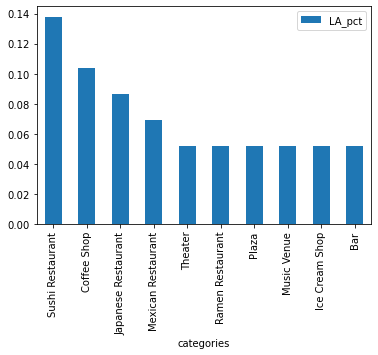

In [42]:
df_LA[0:10].plot.bar(y='LA_pct')

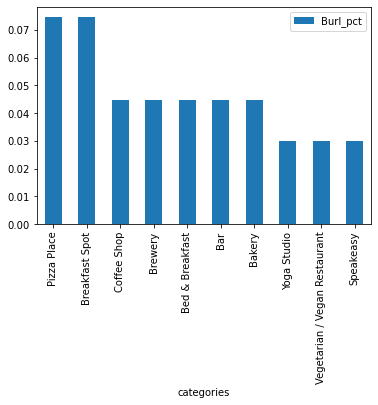

In [43]:
df_Burl[0:10].plot.bar(y='Burl_pct')

<H2>6. Conclusion</H2>

After reviewing all of the above information, maps and figures it's easy to see that these two cities are vastly different. While this is not really any surprise, some of the differences were unexpected, nonetheless. In particular, the density of venues seems opposite of what one might expect. The venues in LA are further from the city center than those of the much smaller, less dense Burlington. This appears to be mostly due to a difference in clustering. The venues in LA are in several distinct clusters a bit further from city center. Those in Burlington are more evenly distributed from the center, but not in any distinct clusters. 

Lastly, there are some differences in the types of restaraunts seen around the city centers of these two cities. There are more casual dinning options around Burlington city center and more finer dinning options in the center of LA.